File name: 2 RSSI Analysis v5 seaborn & plotly
# Statistics of the RSSI at a location
Find the relationship of
1. Univariate Distribution of RSSI of each base station
2. Accuracy (i.e. RSSI value is stable) vs Number of Measurements
3. Time Taken vs Number of Measurements
4. Accuracy of RSSI vs Accuracy of LLS Estimated Location

In [1]:
import datetime
current_datetime = datetime.datetime.today()
print("This .ipynb last executed at {dt}".format(dt=current_datetime))

This .ipynb last executed at 2020-05-10 18:53:00.331749


## Setup: Import the Dataset

In [2]:
import os #Check the path only
import pandas as pd
pd.set_option('display.max_columns', None) #Setting to display All columns of Dataframe
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

#Import the most common plotly libraries
import plotly.offline as py
import plotly.figure_factory as ff 
import plotly.graph_objs as go 
from plotly import tools
# Activate inline plotting in notebook
py.init_notebook_mode(connected = False)


In [3]:
#Import data from .xlsx
fileName = 'cleaned_nCr_rssi_tst_loc2_04_3E81CB_20200316'
excelData = pd.read_excel(fileName+'.xlsx', index_col=0)
# excelData = pd.read_csv(fileName+'.csv', index_col=0)

#Check the data types of all columns
print(excelData.info())
print("\n\n==============================================================================================")

#Testing, data at the 272nd row
# excelData.loc[272]

#Convert type to 'string'
# excelData['duplicate'] = csvData['duplicate'].astype(str)          #
# excelData = excelData.assign(station=excelData['station'].astype(str)) #another way to convert to 'string'

excelData.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3044 entries, 0 to 3043
Data columns (total 38 columns):
Iteration               2844 non-null float64
DateRecorded            2844 non-null object
TimeRecorded            2844 non-null object
seqNumber               3044 non-null int64
station                 2844 non-null object
rssi                    2844 non-null float64
ExpectedRSSI            2844 non-null float64
DistanceBSandDevice     2844 non-null float64
snr                     2844 non-null float64
data                    2844 non-null object
time                    2844 non-null float64
device                  2844 non-null object
BaseStationLat          2844 non-null float64
BaseStationLng          2844 non-null float64
BaseStationHeight       2844 non-null float64
BaseStationRegion       2844 non-null object
SubDistrict             2844 non-null object
BaseStationX            2844 non-null float64
BaseStationY            2844 non-null float64
OriginGPSLat            2844

Iteration DateRecorded TimeRecorded  seqNumber station   rssi  \
indexOriginal                                                                  
0                    1.0   2020-03-16     17:49:18       1633    6C6B -101.0   
1                    1.0   2020-03-16     17:49:18       1633    6DEB  -83.0   
2                    1.0   2020-03-16     17:49:18       1633    6DED -124.0   
3                    1.0   2020-03-16     17:49:18       1633    6E12 -116.0   
4                    1.0   2020-03-16     17:49:18       1633    790C -106.0   

               ExpectedRSSI  DistanceBSandDevice  snr  \
indexOriginal                                           
0               -128.258200          6461.420342  6.0   
1               -117.452401          2388.339372  6.0   
2               -131.864372          9006.890630  6.0   
3               -121.413811          3439.952412  6.0   
4               -120.380045          3127.532323  6.0   

                                   data          time  device  BaseStationLat  \
indexOriginal                                                                   
0              01542a4206ce267000000000  1.584352e+09  3E81CB       22.308348   
1              01542a4206ce267000000000  1.584352e+09  3E81CB       22.286528   
2              01542a4206ce267000000000  1.584352e+09  3E81CB       22.323885   
3              01542a4206ce267000000000  1.584352e+09  3E81CB       22.322607   
4              01542a4206ce267000000000  1.584352e+09  3E81CB       22.291644   

               BaseStationLng  BaseStationHeight BaseStationRegion  \
indexOriginal                                                        
0                  114.234173              102.0           Kowloon   
1                  114.151484               87.0  Hong Kong Island   
2                  114.254535              132.0   New Territories   
3                  114.163759               50.0           Kowloon   
4                  114.203960               84.0  Hong Kong Island   

               SubDistrict  BaseStationX  BaseStationY  OriginGPSLat  \
indexOriginal                                                          
0                      xxx    33513.9487    15638.9706     22.167615   
1               Sheung Wan    25004.3291    13214.2206     22.167615   
2                      xxx    35609.4251    17365.5215     22.167615   
3                      xxx    26267.5635    17223.5036     22.167615   
4              North Point    30404.6946    13782.7367     22.167615   

               OriginGPSLng  PathLossExponent  ReferenceRSSI  DeviceLLSLat  \
indexOriginal                                                                
0                113.908514               2.5            -33     22.299664   
1                113.908514               2.5            -33     22.299664   
2                113.908514               2.5            -33     22.299664   
3                113.908514               2.5            -33     22.299664   
4                113.908514               2.5            -33     22.299664   

               DeviceLLSLng   DeviceLLSX    DeviceLLSY  DeviceGPSLat  \
indexOriginal                                                          
0                 114.19429  29409.56432  14673.995788     22.293025   
1                 114.19429  29409.56432  14673.995788     22.293025   
2                 114.19429  29409.56432  14673.995788     22.293025   
3                 114.19429  29409.56432  14673.995788     22.293025   
4                 114.19429  29409.56432  14673.995788     22.293025   

               DeviceGPSLng  LocalizationError  note  nCrPathLossExponent  \
indexOriginal                                                               
0                114.173606        2252.870929  rssi             2.050388   
1                114.173606        2252.870929  rssi             2.050388   
2                114.173606        2252.870929  rssi             2.050388   
3                114.173606        2252.870929  rssi 

## Preparation of the RSSI data
1. Sort the data
2. Separate raw RSSI data frame by the base station ID. Assign the separated RSSI data into a dictionary dict
3. Insert index in the frist column of the dataframe 
4. Summary Statistics of the RSSI, SNR and Average SNR of each base station

### 1. Sort the Data

In [4]:
#Make a copy
sortedData = excelData.copy()

#Change type to 
# sortedData[['rssi', 'snr', 'avgSnr']] = sortedData[['rssi', 'snr', 'avgSnr']].apply(pd.to_numeric)

#Sort data by 'station'
sortedData = sortedData.sort_values('station')
sortedData.head()


Iteration DateRecorded TimeRecorded  seqNumber station   rssi  \
indexOriginal                                                                  
2466                12.0   2020-03-16     18:13:20       1720    6BFE -127.0   
2815                14.0   2020-03-16     18:16:39       1732    6BFE -124.0   
745                  4.0   2020-03-16     17:56:45       1660    6BFE -125.0   
694                  3.0   2020-03-16     17:56:13       1658    6BFE -123.0   
1662                 9.0   2020-03-16     18:05:36       1692    6BFE -125.0   

               ExpectedRSSI  DistanceBSandDevice  snr  \
indexOriginal                                           
2466            -131.520919          8726.433006  6.0   
2815            -131.520919          8726.433006  6.0   
745             -131.520919          8726.433006  6.0   
694             -131.520919          8726.433006  6.0   
1662            -131.520919          8726.433006  6.0   

                                   data          time  device  BaseStationLat  \
indexOriginal                                                                   
2466           01542a3606ce264800000000  1.584354e+09  3E81CB       22.362571   
2815           01542a3606ce264800000000  1.584354e+09  3E81CB       22.362571   
745            01542a4606ce267000000000  1.584353e+09  3E81CB       22.362571   
694            01542a4206ce267000000000  1.584353e+09  3E81CB       22.362571   
1662           01542a4206ce264800000000  1.584353e+09  3E81CB       22.362571   

               BaseStationLng  BaseStationHeight BaseStationRegion  \
indexOriginal                                                        
2466               114.134226               90.0   New Territories   
2815               114.134226               90.0   New Territories   
745                114.134226               90.0   New Territories   
694                114.134226               90.0   New Territories   
1662               114.134226               90.0   New Territories   

              SubDistrict  BaseStationX  BaseStationY  OriginGPSLat  \
indexOriginal                                                         
2466                  xxx    23228.2883    21664.5076     22.167615   
2815                  xxx    23228.2883    21664.5076     22.167615   
745                   xxx    23228.2883    21664.5076     22.167615   
694                   xxx    23228.2883    21664.5076     22.167615   
1662                  xxx    23228.2883    21664.5076     22.167615   

               OriginGPSLng  PathLossExponent  ReferenceRSSI  DeviceLLSLat  \
indexOriginal                                                                
2466             113.908514               2.5            -33     22.321307   
2815             113.908514               2.5            -33     22.319949   
745              113.908514               2.5            -33     22.321277   
694              113.908514               2.5            -33     22.320385   
1662             113.908514               2.5            -33     22.313278   

               DeviceLLSLng    DeviceLLSX    DeviceLLSY  DeviceGPSLat  \
indexOriginal                                                           
2466             114.175820  27508.778812  17079.046999     22.293025   
2815             114.166492  26548.800607  16928.087305     22.293025   
745              114.166552  26554.947613  17075.688961     22.293025   
694              114.177956  27728.560775  16976.614140     22.293025   
1662             114.177114  27641.956618  16186.857050     22.293025   

               DeviceGPSLng  LocalizationError  note  nCrPathLossExponent  \
indexOriginal                                                               
2466             114.173606        3151.094964  rssi             2.963585   
2815             114.173606        3080.162288  rssi             2.297643   
745              114.173606        3222.334225  rssi             2.521422   
694              114.173606        3073.188708  rssi 

### 2. Separate raw RSSI data frame by the base station ID
#### 2.1 Check Number of base stations with their ID

In [5]:
#Extract only the RSSI measurement, without LLS results
df = sortedData[sortedData['note'].str.contains('rssi')]

print('BS ID\t\t' + 'count of measurements')
print('____________________________')
print(df['station'].value_counts().sort_index(ascending=True))

#Get the base station ID
bsId = df['station'].unique() #.unique() gets Unique Values from a Column
#Number of BS ID
numbOfBS = len(bsId)

print('\n=== Unique BS ID in this location =============')
print(bsId) 
print('@type: ' + str(type(bsId)))
print('@numb of BS: ' + str(len(bsId)))

print('\n=== testing =============')
print(sortedData['station'][0])


BS ID		count of measurements
____________________________
6BFE     14
6C6B    100
6DEB    100
6DED     92
6E12     93
790C    100
79BF    100
79CD     99
79E3      2
7A06     99
7A32      7
7A4E    100
7A65     99
7B21    100
7C43    100
7C4B     52
7C52     38
7C54    100
7C59     78
7C6B     98
7C86     57
7F0F     96
7F10    100
7F1F    100
7F27    100
8041    100
8042    100
8043    100
80C7    100
810F     94
8111      1
8112     55
8114     40
8117    100
8123      4
8141     88
8142     36
814E      2
Name: station, dtype: int64

=== Unique BS ID in this location =============
['6BFE' '6C6B' '6DEB' '6DED' '6E12' '790C' '79BF' '79CD' '79E3' '7A06'
 '7A32' '7A4E' '7A65' '7B21' '7C43' '7C4B' '7C52' '7C54' '7C59' '7C6B'
 '7C86' '7F0F' '7F10' '7F1F' '7F27' '8041' '8042' '8043' '80C7' '810F'
 '8111' '8112' '8114' '8117' '8123' '8141' '8142' '814E']
@type: <class 'numpy.ndarray'>
@numb of BS: 38

=== testing =============
6C6B


## 2.2 Sorting dataframe by a column name. Store RSSI values according to base station ID in a dictionary.

In [6]:
#Extract only the RSSI measurement, without LLS results
allData = sortedData[sortedData['note'].str.contains('rssi')].copy()

#Store RSSI values according to base station ID in a dictionary.
rssiByBsId = {}
for item in bsId:
    key = item
    value = allData[(allData['station'].str.contains(item))]
    rssiByBsId.update( { key: value} )
    
rssiByBsId[bsId[0]]


Iteration DateRecorded TimeRecorded  seqNumber station   rssi  \
indexOriginal                                                                  
2466                12.0   2020-03-16     18:13:20       1720    6BFE -127.0   
2815                14.0   2020-03-16     18:16:39       1732    6BFE -124.0   
745                  4.0   2020-03-16     17:56:45       1660    6BFE -125.0   
694                  3.0   2020-03-16     17:56:13       1658    6BFE -123.0   
1662                 9.0   2020-03-16     18:05:36       1692    6BFE -125.0   
1576                 8.0   2020-03-16     18:04:47       1689    6BFE -124.0   
797                  5.0   2020-03-16     17:57:20       1662    6BFE -125.0   
1952                10.0   2020-03-16     18:08:22       1702    6BFE -125.0   
1430                 7.0   2020-03-16     18:03:24       1684    6BFE -126.0   
191                  2.0   2020-03-16     17:51:15       1640    6BFE -126.0   
2785                13.0   2020-03-16     18:16:24       1731    6BFE -119.0   
133                  1.0   2020-03-16     17:50:41       1638    6BFE -124.0   
2177                11.0   2020-03-16     18:10:35       1710    6BFE -126.0   
1197                 6.0   2020-03-16     18:01:11       1676    6BFE -128.0   

               ExpectedRSSI  DistanceBSandDevice  snr  \
indexOriginal                                           
2466            -131.520919          8726.433006  6.0   
2815            -131.520919          8726.433006  6.0   
745             -131.520919          8726.433006  6.0   
694             -131.520919          8726.433006  6.0   
1662            -131.520919          8726.433006  6.0   
1576            -131.520919          8726.433006  6.0   
797             -131.520919          8726.433006  6.0   
1952            -131.520919          8726.433006  6.0   
1430            -131.520919          8726.433006  6.0   
191             -131.520919          8726.433006  6.0   
2785            -131.520919          8726.433006  6.0   
133             -131.520919          8726.433006  6.0   
2177            -131.520919          8726.433006  6.0   
1197            -131.520919          8726.433006  6.0   

                                   data          time  device  BaseStationLat  \
indexOriginal                                                                   
2466           01542a3606ce264800000000  1.584354e+09  3E81CB       22.362571   
2815           01542a3606ce264800000000  1.584354e+09  3E81CB       22.362571   
745            01542a4606ce267000000000  1.584353e+09  3E81CB       22.362571   
694            01542a4206ce267000000000  1.584353e+09  3E81CB       22.362571   
1662           01542a4206ce264800000000  1.584353e+09  3E81CB       22.362571   
1576           01542a4206ce264800000000  1.584353e+09  3E81CB       22.362571   
797            01542a4206ce267000000000  1.584353e+09  3E81CB       22.362571   
1952           01542a3a06ce264800000000  1.584353e+09  3E81CB       22.362571   
1430           01542a4206ce264800000000  1.584353e+09  3E81CB       22.362571   
191            01542a4206ce267000000000  1.584352e+09  3E81CB       22.362571   
2785           01542a3606ce264800000000  1.584354e+09  3E81CB       22.362571   
133            01542a4206ce267000000000  1.584352e+09  3E81CB       22.362571   
2177           01542a3a06ce264800000000  1.584353e+09  3E81CB       22.362571   
1197           01542a4206ce264800000000  1.584353e+09  3E81CB       22.362571   

               BaseStationLng  BaseStationHeight BaseStationRegion  \
indexOriginal                                                        
2466               114.134226               90.0   New Territories   
2815               114.134226               90.0   New Territories   
745                114.134226               90.0   New Territories   
694                114.134226               90.0   New Territories   
1662               114.134226               90.0   New Territories   
1576               114.134226     

### ('1 RSSI Data Preparation.ipynb' done) 3. Insert index in the frist column of the dataframe 
For the plot of "RSSI vs no. of measurements"

In [7]:
# print(len(rssiByBsId[bsId[2]]))
# for var in rssiByBsId:
#     print({var: len(rssiByBsId[var])}) 
#     index_list = []
#     for index in range(len(rssiByBsId[var])):
#         index_list.append(index+1)
#     print(index_list)
#     rssiByBsId[var].insert(loc=0, column='index', value=index_list)
# #     print(rssiByBsId[var])

# rssiByBsId[bsId[3]]

### 4. Time Taken vs Number of Measurements
#### Total time over 20 measurements at a location 
    
    i.e. time of the first Sigfox message by seqNumber - time of the last Sigfox message by seqNumber

In [8]:
import datetime

df = excelData[excelData['note']=='rssi'].copy()
# df = df[['DateRecorded','TimeRecorded']].astype(str)

timestamp_1 = df.head(1)['time'].values[0] #time of the first row (1st Sigfox message by seqNumber)
dt_obj_1 = datetime.datetime.fromtimestamp(int(timestamp_1))
timestamp_2 = df.tail(1)['time'].values[0] #time of the last row (last Sigfox message by seqNumber
dt_obj_2 = datetime.datetime.fromtimestamp(int(timestamp_2))
dt_diff = abs(dt_obj_1 - dt_obj_2)

print('1) first datetime\t{0}'.format(dt_obj_1))
print('2) last datetime\t{0}'.format(dt_obj_2))
print('3) time difference\t{0}'.format(dt_diff))

numbMeasures = len(df['seqNumber'].unique())
gpsLat = df['DeviceGPSLat'].head(1).values[0]
gpsLng = df['DeviceGPSLng'].head(1).values[0]
print('\nTime for {0} measurements at GPS({1}, {2})\n {3} (hr:min:s)'.format(numbMeasures,gpsLat,gpsLng,dt_diff))


1) first datetime	2020-03-16 17:49:18
2) last datetime	2020-03-16 18:16:39
3) time difference	0:27:21

Time for 100 measurements at GPS(22.293025, 114.173606)
 0:27:21 (hr:min:s)


#### Mean time to take 1 measurement
    
    step 1. get the time differences between the previous and next measurements
    
    step 2. find the mean of the time difference

In [9]:
import datetime

df = excelData.copy()
df = df[df['note'].str.contains('rssi')] #Extract only the datatime of the RSSI measurements
seqNumber = df['seqNumber'].unique()
numList = list()
next_i = 0
for index in range(len(seqNumber)):
    next_i = index+1
    if (next_i <= len(seqNumber)-1):
#         print(index)
#         print(next_i)
        previous_timestamp = df[df['seqNumber']==seqNumber[index]]['time'].values[0]
        previous_time_obj = datetime.datetime.fromtimestamp(int(previous_timestamp))
        next_time_timestamp = df[df['seqNumber']==seqNumber[next_i]]['time'].values[0]
        next_time_obj = datetime.datetime.fromtimestamp(int(next_time_timestamp))
        
        time_diff = abs(next_time_obj - previous_time_obj)
#         print(time_diff)
        numList.append(time_diff)
    else:
        pass
#     break
# print(numList)
numList = pd.DataFrame(numList, columns=['Statistic of the Time of Measurements (D H:M:S.s)'])
numList.describe()


Statistic of the Time of Measurements (D H:M:S.s)
count                                                99
mean                             0 days 00:00:16.575757
std                              0 days 00:00:00.821781
min                                     0 days 00:00:15
25%                                     0 days 00:00:16
50%                                     0 days 00:00:17
75%                                     0 days 00:00:17
max                                     0 days 00:00:18

## Distributions of the RSSI of each stations

### 1. Summary Statistics of the RSSI (can change to: SNR and Average SNR) of each base station

In [10]:
#test
# rssiByBsId[bsId[3]][['rssi','snr','avgSnr']].describe()

numDF = pd.DataFrame()
count = 0
for var in rssiByBsId:
    df = rssiByBsId[var].reset_index()
    name = var+' rssi'
    df[name] = df['rssi']
    df = df[name]
#     print(df)
    numDF = pd.concat([numDF,df], axis=1, sort=False)
    count += 1
print(numDF.describe())

        6BFE rssi  6C6B rssi   6DEB rssi   6DED rssi   6E12 rssi   790C rssi  \
count   14.000000  100.00000  100.000000   92.000000   93.000000  100.000000   
mean  -124.785714  -98.49000  -82.080000 -118.880435 -116.032258 -103.210000   
std      2.118729    1.89361    1.643352    2.444291    2.680248    1.976095   
min   -128.000000 -103.00000  -87.000000 -127.000000 -125.000000 -109.000000   
25%   -126.000000 -100.00000  -83.000000 -120.000000 -117.000000 -104.000000   
50%   -125.000000  -98.00000  -82.000000 -118.500000 -116.000000 -103.000000   
75%   -124.000000  -97.00000  -81.000000 -117.000000 -114.000000 -102.000000   
max   -119.000000  -95.00000  -79.000000 -114.000000 -111.000000 -100.000000   

       79BF rssi   79CD rssi   79E3 rssi   7A06 rssi   7A32 rssi   7A4E rssi  \
count  100.00000   99.000000    2.000000   99.000000    7.000000  100.000000   
mean   -91.05000 -116.757576 -121.500000 -115.181818 -127.000000  -81.530000   
std      1.47966    2.312746    0.70710

### 2. Individual Analysis (Distribution of RSSI of each station over 20 measurements at a loction)
### Univariate Exploration 
### 2.1 boxplot, distribution plot and violin plot

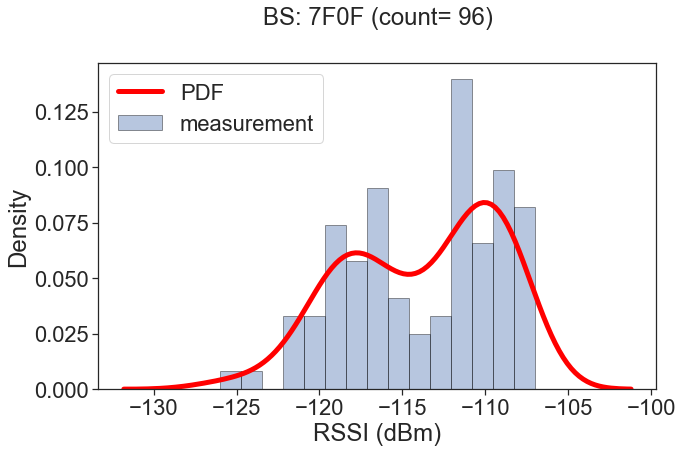

In [22]:

def singleDistplot(df, binsNumb=15, bs=""):
    bsCount = str(len(df))
    sb.set(font_scale=2, style='ticks')
    f, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,6))

    #Dist plot
    from scipy.stats import norm
    sb.distplot(df['rssi'],hist=True, kde=True, bins=binsNumb,norm_hist=False, 
#                 fit=norm,
                hist_kws={'edgecolor':'black','label':'measurement'}, kde_kws={'linewidth': 5, 'color':'red',"label":"PDF"})
    plt.title('BS: '+bs+ ' (count= '+bsCount+')',y=1.1)
    plt.xlabel('RSSI (dBm)')
    plt.ylabel('Density')
    plt.show()

#normal: 6C6B 8043
#strange: 7A06 7A4E 8042 8041
#strangest: 7C6B 7F0F
bs = '7F0F'
df = rssiByBsId[bs].copy()
singleDistplot(df,bs=bs)



no. of BS: 38
=== The Univariate Distribution of RSSI of each base station ===
y-axis is normalized. It shows a density rather than a count. This is implied if a KDE or fitted density is plotted.


/Users/Sing/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning:

Degrees of freedom <= 0 for slice

/Users/Sing/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning:

invalid value encountered in double_scalars

/Users/Sing/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning:

invalid value encountered in true_divide

/Users/Sing/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning:

invalid value encountered in double_scalars



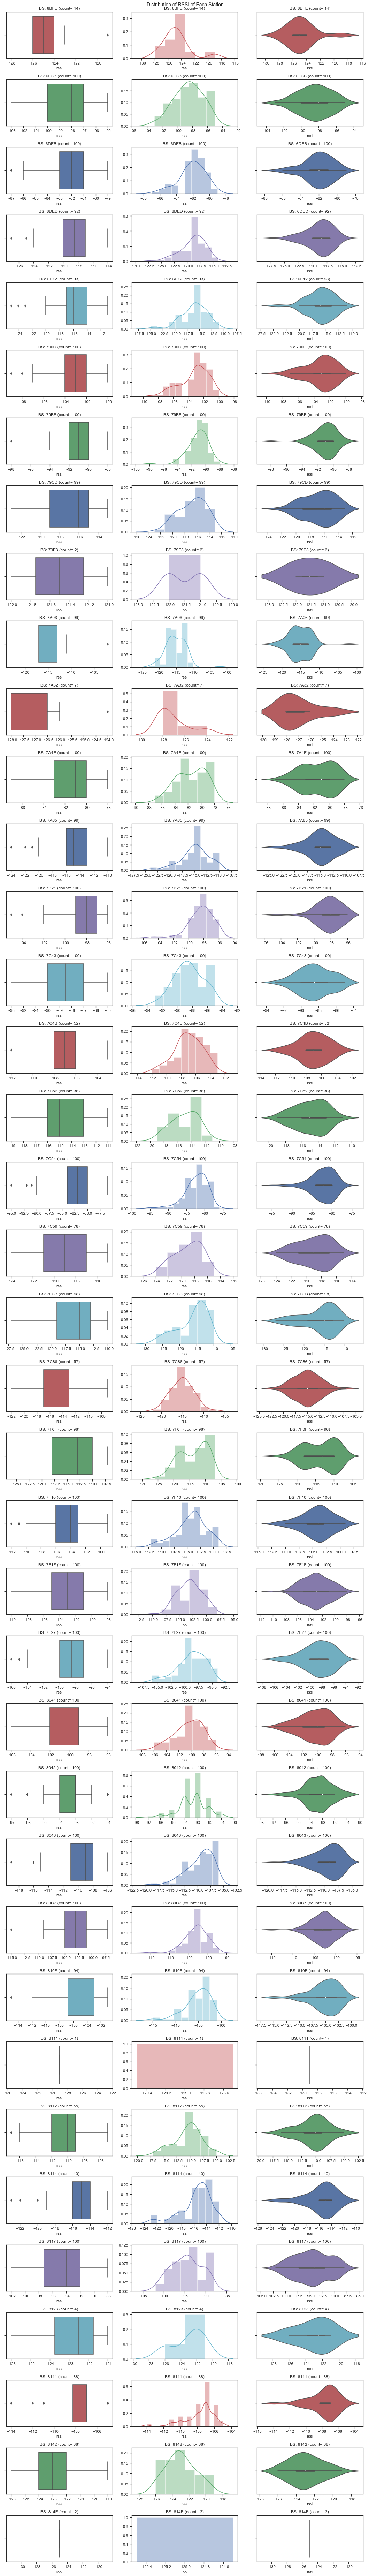

In [11]:
print('no. of BS: '+str(len(rssiByBsId)))

##Self 
#Change font size of the plot
#==> https://stackoverflow.com/questions/25328003/how-can-i-change-the-font-size-using-seaborn-facetgrid
sb.set(font_scale=1, style='ticks')
nrows = len(rssiByBsId)
ncols = 3
fig1, axes1 = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*5, nrows*2.7))
# fig1.subplots_adjust(top=0.8, hspace = .7)
fig1.suptitle('Distribution of RSSI of Each Station', fontsize=14, y=1)

colors = ["r", "g", "b", "m", "c"]
count_ax = 0
count_colour = 0
# print(len(colors))
print('=== The Univariate Distribution of RSSI of each base station ===')
print('y-axis is normalized. It shows a density rather than a count. This is implied if a KDE or fitted density is plotted.')

for var in rssiByBsId:
    df = rssiByBsId[var]
    bsCount = str(len(df))
    sb.boxplot(df['rssi'], orient = "h", color = colors[count_colour], ax = axes1[count_ax,0]).set_title('BS: '+var+ ' (count= '+bsCount+')')
    sb.distplot(df['rssi'], color = colors[count_colour], ax = axes1[count_ax,1]).set_title('BS: '+var+ ' (count= '+bsCount+')')
    sb.violinplot(df['rssi'], color = colors[count_colour], ax = axes1[count_ax,2]).set_title('BS: '+var+ ' (count= '+bsCount+')')
#     print(count_ax)
    count_ax += 1
    count_colour += 1 
    if (count_colour > (len(colors)-1)):
        count_colour = 0

fig1.tight_layout()



### 2.2 box plot
(Plot boxplot of all rssi) 
(Arrange them horizontally)

In [12]:
# sb.set(font_scale=1.1, style="whitegrid")
# f, axes = plt.subplots(nrows=1, ncols=1, figsize=(18, 14))
# sb.boxplot(x = 'rssi', y = 'station', data = allData)

# # Add in points to show each observation  
# sb.swarmplot(x="rssi", y="station", data=allData, size=3, color=".4", linewidth=0).set_title('Distribution of RSSI of Each Station', fontsize=38)


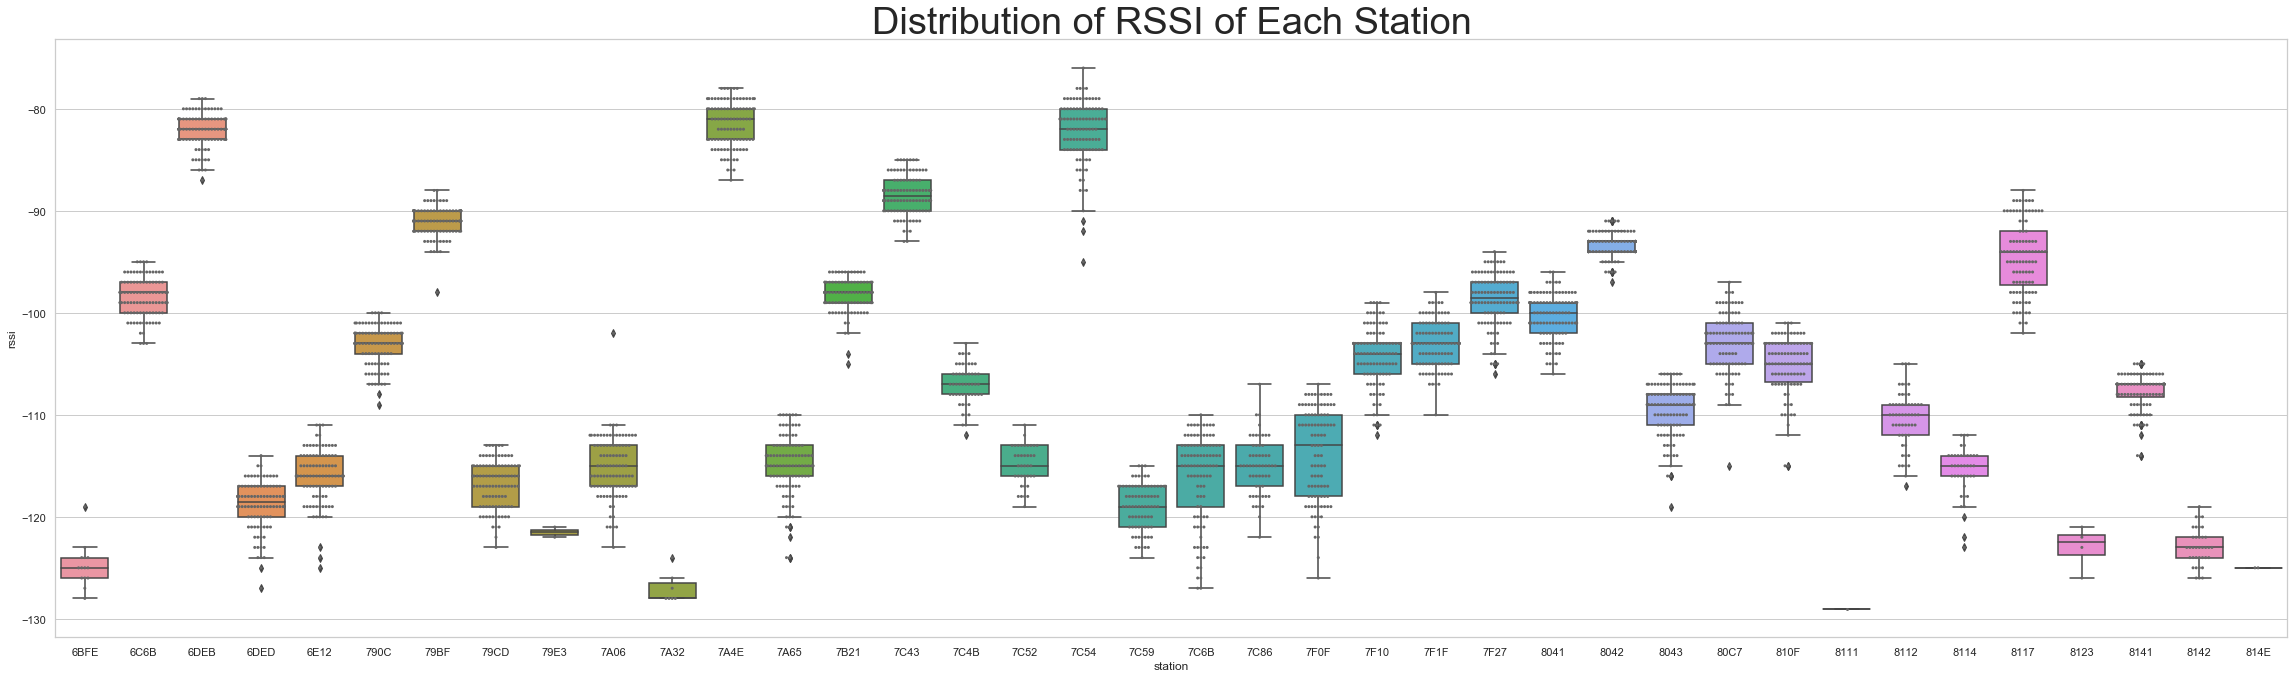

In [13]:

sb.set(font_scale=1, style='whitegrid')
f, axes = plt.subplots(nrows=1, ncols=1, figsize=(40, 11))

#Boxplot
sb.boxplot(x = 'station', y = 'rssi', data = allData).set_title('Distribution of RSSI of Each Station', fontsize=38)

# Add in points to show each observation  
sb.swarmplot(x="station", y="rssi", data=allData, size=3, color=".4", linewidth=0)

### 3. Mutual Analysis

Find the relationship of 
1. "RSSI vs no. of measurements" of a station
2. "Accuracy of RSSI vs Accuracy of LLS Estimated Location"


### Bivariate Exploration
### 3.1 RSSI vs no. of measurements (Heatmap of Correlation Matrix)
Find correlation between RSSI and no. of measurements of a station. 

In [14]:
# # Test - Correlation Matrix
# df = rssiByBsId[bsId[1]][['rssi','seqNumber']]
# print('Test of correlation matrix')
# print(df.corr())

# # Heatmap of the Correlation Matrix
# print('The correlation matrix of RSSI')
# sb.set(font_scale=4)
# ncols = 6
# nrows = int(np.ceil((len(rssiByBsId)/ncols)))
# fig2, axes2 = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*10, nrows*8))
# fig2.suptitle('Distribution of RSSI of Each Station\n(RSSI vs Number of measurements)', fontsize=80, y=1.03)
# count_ax_row = 0
# count_ax_col = 0

# for var in rssiByBsId:
#     df = rssiByBsId[var]
#     bsCount = str(len(df))
# #     sb.boxplot(rssiByBsId[var]['rssi'], orient = "h", color = colors[count_colour], ax = axes[count_ax,0]).set_title(var+ ' (#'+bsCount+')')
#     sb.heatmap(df[['rssi','seqNumber']].corr(), vmin = -1, vmax = 1, linewidths = 1, 
#                annot = True, fmt = ".2f", annot_kws = {"size": 50}, cmap = "RdBu", ax=axes2[count_ax_row,count_ax_col]).set_title(var+ ' (#'+bsCount+')')
#     count_ax_col += 1
#     if count_ax_col >= ncols:
#         count_ax_row += 1
#         count_ax_col = 0 
#         print(count_ax_row)
        
# fig2.tight_layout()


### 3.2 RSSI vs no. of measurements (Scatter plot)
Find correlation between RSSI and no. of measurements of a station. 
(Highlight the plots if the correlation of RSSI and no. of measurements > threshold)

In [15]:
# sb.set(font_scale=4)
# # f3, axes3 = plt.subplots(2, 8, figsize=(100, 30)) 
# # sb.scatterplot(x = "index", y = "rssi", data = rssiByBsId[bsId[2]], ax=axes3[1,2], s=1000, color='red').set_title('var'+ ' (#'+bsCount+')')

# ncols = 6
# nrows = int(np.ceil((len(rssiByBsId)/ncols)))
# f3, axes3 = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*12, nrows*10))
# f3.suptitle('Distribution of RSSI of Each Station\n(RSSI vs Number of measurements)', fontsize=80, y=1.03)
# colors = ["r", "g", "b", "m", "c"]
# count_ax_col = 0
# count_ax_row = 0
# count_colour = 0

# for var in rssiByBsId:
#     df = rssiByBsId[var]
#     bsCount = str(len(df))
#     corr = str(format(df['rssi'].corr(df['seqNumber']),'.2f'))
# #     print(corr)
#     sb.scatterplot(x = "seqNumber", y = "rssi", data = df, ax=axes3[count_ax_row,count_ax_col], s=1000, color=colors[count_colour]).set_title(var+'\n(#'+bsCount+')'+'(corr:'+corr+')')
#     sb.regplot(x = "seqNumber", y = "rssi", data = df, ax=axes3[count_ax_row,count_ax_col], 
#                x_ci="sd", line_kws={"linewidth": 5},color=colors[count_colour-2]).set_title(var+'\n(#'+bsCount+')'+'(corr:'+corr+')')
# #     sb.violinplot(rssiByBsId[var]['rssi'], color = colors[count_colour], ax = axes1[count_ax,2]).set_title(var+ ' (#'+bsCount+')')
# #     print(count_ax)
#     count_ax_col += 1
#     count_colour += 1 
#     if count_ax_col >= ncols:
#         count_ax_row += 1
#         count_ax_col = 0 
#         print(count_ax_row)
#     if (count_colour > (len(colors)-1)):
#         count_colour = 0
# # f3.suptitle('Horizontally stacked subplots')
# f3.tight_layout()

### 3.3 RSSI vs no. of measurements (Line plot)

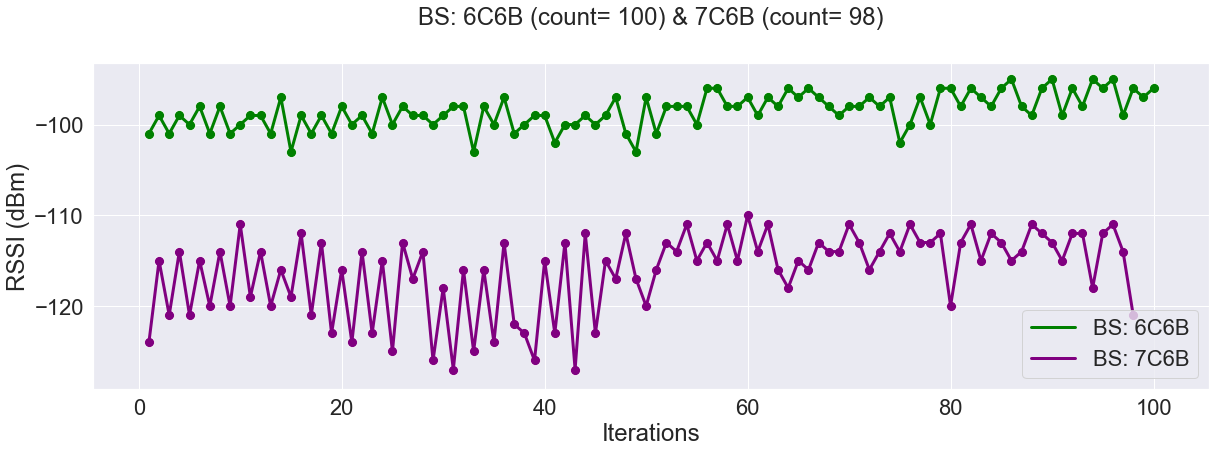

In [23]:

def singleBSRSSI(df1,df2,bs1,bs2):
    bsCount1 = str(len(df1))
    bsCount2 = str(len(df2))
    sb.set(font_scale=2, style='darkgrid')
    f, axes = plt.subplots(nrows=1, ncols=1, figsize=(20,6))
    #Line plot 1
    sb.lineplot(x="Iteration", y="rssi", data=df1, markers=True, linewidth=3, color='green', label='BS: '+bs1)
    sb.scatterplot(x = "Iteration", y = "rssi", data = df1, s=100, color='green')
    #line plot 2
    sb.lineplot(x="Iteration", y="rssi", data=df2, markers=True, linewidth=3, color='purple', label='BS: '+bs2)
    sb.scatterplot(x = "Iteration", y = "rssi", data = df2, s=100, color='purple')
    
    plt.title('BS: '+bs1 + ' (count= '+bsCount1+')'+' & '+bs2 +' (count= '+bsCount2+')',y=1.1)
    plt.xlabel('Iterations')
    plt.ylabel('RSSI (dBm)')
    plt.show()
#normal: 6C6B 8043
#strange: 7A06 7A4E 8042 7C6B 7F0F 8041
bs1 = '6C6B'
bs2 = '7C6B'
df1 = rssiByBsId[bs1].copy()
df2 = rssiByBsId[bs2].copy()
singleBSRSSI(df1,df2,bs1,bs2)



1
2
3
4
5


/Users/Sing/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning:

Degrees of freedom <= 0 for slice

/Users/Sing/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning:

divide by zero encountered in true_divide



6


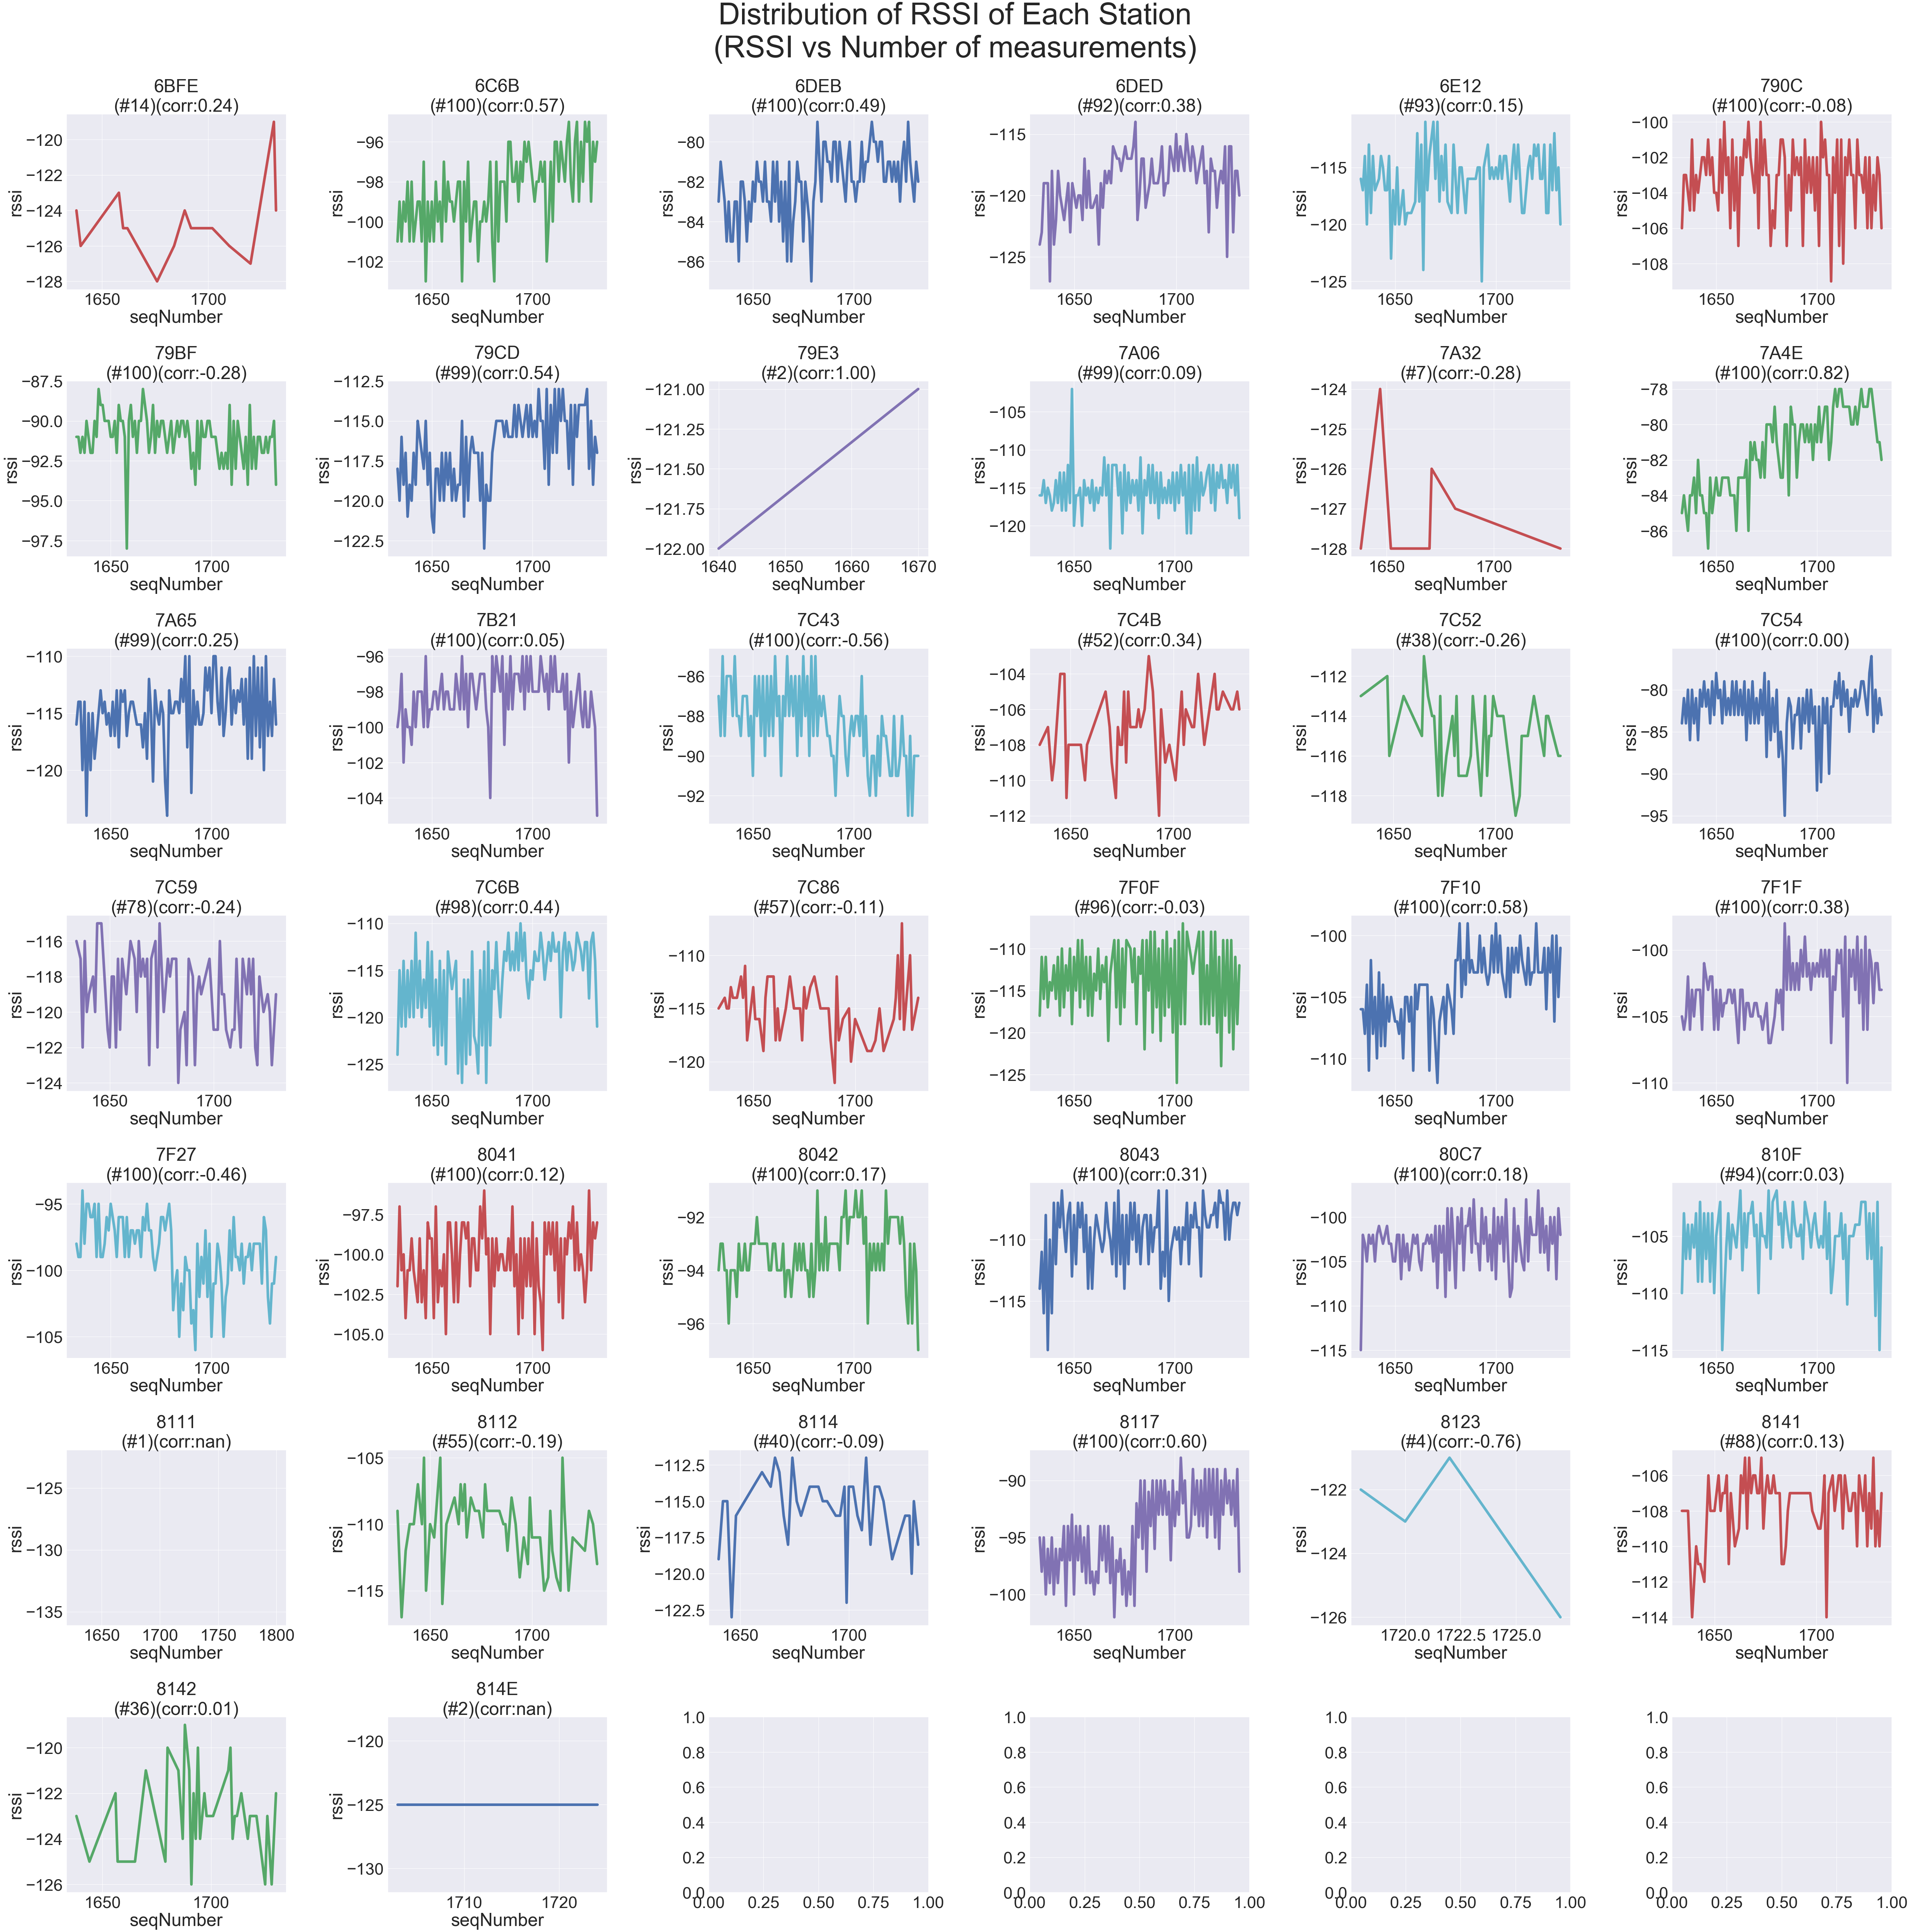

In [16]:
sb.set(font_scale=4)
ncols = 6
nrows = int(np.ceil((len(rssiByBsId)/ncols)))
f3, axes3 = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*12, nrows*10))
f3.suptitle('Distribution of RSSI of Each Station\n(RSSI vs Number of measurements)', fontsize=80, y=1.03)
colors = ["r", "g", "b", "m", "c"]
count_ax_col = 0
count_ax_row = 0
count_colour = 0

for var in rssiByBsId:
    df = rssiByBsId[var]
    bsCount = str(len(df))
    corr = str(format(df['rssi'].corr(df['seqNumber']),'.2f'))
#     print(corr)
    sb.lineplot(x="seqNumber", y="rssi", data=df, linewidth=7 , ax=axes3[count_ax_row,count_ax_col], color=colors[count_colour]).set_title(var+'\n(#'+bsCount+')'+'(corr:'+corr+')')
#     sb.regplot(x = "seqNumber", y = "rssi", data = df, ax=axes3[count_ax_row,count_ax_col], 
#                x_ci="sd", line_kws={"linewidth": 5},color=colors[count_colour-2]).set_title(var+'\n(#'+bsCount+')'+'(corr:'+corr+')')
    #     sb.violinplot(rssiByBsId[var]['rssi'], color = colors[count_colour], ax = axes1[count_ax,2]).set_title(var+ ' (#'+bsCount+')')
#     print(count_ax)
    count_ax_col += 1
    count_colour += 1 
    if count_ax_col >= ncols:
        count_ax_row += 1
        count_ax_col = 0 
        print(count_ax_row)
    if (count_colour > (len(colors)-1)):
        count_colour = 0
# f3.suptitle('Horizontally stacked subplots')
f3.tight_layout()

### 3.3 Accuracy of RSSI vs Accuracy of LLS Estimated Location (Heatmap of Correlation Matrix)
plot "accuracy of RSSI vs accuracy of LLS estimated location"
    
    accuracy of RSSI = ‘expected RSSI based on real location’ vs ‘measured RSSI’

    accuracy of LLS = location error

In [17]:

# #Get "Accuracy of RSSI" and prepare the dataframe for plotting
# df_plot = sortedData[sortedData['note']=='rssi'] #Only RSSI measurements are needed
# df_plot = df_plot[['seqNumber','station','rssi','ExpectedRSSI','LocalizationError']]
# df_plot['LE'] = df_plot['LocalizationError']
# df_plot['ExpRSSI-rssi'] = (df_plot['ExpectedRSSI'] - df_plot['rssi'])#.abs()
# df_plot['rssi-ExpRSSI'] = (df_plot['rssi'] - df_plot['ExpectedRSSI'])#.abs()

# # Test - Correlation Matrix
# df_test = df_plot[df_plot['station']==bsId[2]].sort_values(['seqNumber'])
# print('Test of correlation matrix')
# print(df_test[['rssi-ExpRSSI','LE']].corr())

# # Heatmap of the Correlation Matrix
# print('The correlation matrix of RSSI')
# sb.set(font_scale=3)
# ncols = 6
# nrows = int(np.ceil((len(rssiByBsId)/ncols)))
# fig2, axes2 = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*10, nrows*8))
# fig2.suptitle('Accuracy of RSSI vs Localization Error', fontsize=120, y=1.03)
# count_ax_row = 0
# count_ax_col = 0

# for var in bsId:
#     df = df_plot[df_plot['station']==var]
# #     print(df)
#     bsCount = str(len(df))
# #     sb.boxplot(rssiByBsId[var]['rssi'], orient = "h", color = colors[count_colour], ax = axes[count_ax,0]).set_title(var+ ' (#'+bsCount+')')
#     sb.heatmap(df[['LE','rssi-ExpRSSI']].corr(), vmin = -1, vmax = 1, linewidths = 1, 
#                annot = True, fmt = ".2f", annot_kws = {"size": 50}, cmap = "RdBu", ax=axes2[count_ax_row,count_ax_col]).set_title(var+ ' (#'+bsCount+')')
#     count_ax_col += 1
#     if count_ax_col >= ncols:
#         count_ax_row += 1
#         count_ax_col = 0 
#         print(count_ax_row)

# fig2.tight_layout()


### 3.4 Accuracy of RSSI vs Accuracy of LLS Estimated Location (Scatter plot)
plot "accuracy of RSSI vs accuracy of LLS estimated location"
    
    accuracy of RSSI = ‘expected RSSI based on real location’ vs ‘measured RSSI’

    accuracy of LLS = location error

In [18]:
# sb.set(font_scale=3.5)
# ncols = 6
# nrows = int(np.ceil((len(rssiByBsId)/ncols)))
# f3, axes3 = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*12, nrows*10))
# f3.suptitle('Accuracy of RSSI vs Localization Error', fontsize=120, y=1.03)
# colors = ["r", "g", "b", "m", "c"]
# count_ax_col = 0
# count_ax_row = 0
# count_colour = 0

# for var in bsId:
#     df = df_plot[df_plot['station']==var]
#     bsCount = str(len(df))
#     corr = str(format(df['rssi-ExpRSSI'].corr(df['LE']),'.2f'))
# #     print(corr)
#     sb.scatterplot(x = "rssi-ExpRSSI", y = "LE", data = df, ax=axes3[count_ax_row,count_ax_col], s=1000, color=colors[count_colour]).set_title(var+'\n(#'+bsCount+')'+'(corr:'+corr+')')
# #     sb.violinplot(rssiByBsId[var]['rssi'], color = colors[count_colour], ax = axes1[count_ax,2]).set_title(var+ ' (#'+bsCount+')')
# #     print(count_ax)
#     count_ax_col += 1
#     count_colour += 1 
#     if count_ax_col >= ncols:
#         count_ax_row += 1
#         count_ax_col = 0 
#         print(count_ax_row)
#     if (count_colour > (len(colors)-1)):
#         count_colour = 0
# # f3.suptitle('Horizontally stacked subplots')
# f3.tight_layout()

In [19]:
#Get "Accuracy of RSSI" and prepare the dataframe for plotting
df_plot = sortedData[sortedData['note']=='rssi'] #Only RSSI measurements are needed
df_plot = df_plot[['seqNumber','station','rssi','ExpectedRSSI','LocalizationError']]
df_plot['LE'] = df_plot['LocalizationError']
df_plot['ExpRSSI-rssi'] = (df_plot['ExpectedRSSI'] - df_plot['rssi'])#.abs()
df_plot['rssi-ExpRSSI'] = (df_plot['rssi'] - df_plot['ExpectedRSSI'])#.abs()
df_plot.sort_values('seqNumber').head()

seqNumber station   rssi  ExpectedRSSI  LocalizationError  \
indexOriginal                                                              
15                  1633    7F0F -118.0   -114.779186        2252.870929   
6                   1633    79CD -118.0   -115.388734        2252.870929   
9                   1633    7A65 -116.0   -126.835836        2252.870929   
19                  1633    8041 -102.0   -118.423402        2252.870929   
12                  1633    7C54  -84.0   -114.664459        2252.870929   

                        LE  ExpRSSI-rssi  rssi-ExpRSSI  
indexOriginal                                           
15             2252.870929      3.220814     -3.220814  
6              2252.870929      2.611266     -2.611266  
9              2252.870929    -10.835836     10.835836  
19             2252.870929    -16.423402     16.423402  
12             2252.870929    -30.664459     30.664459

### 3.5 Localization Error vs Iteration (sequence number)

nCr_rssi_tst_loc2_04_3E81CB_20200316(22.293025,114.173606)


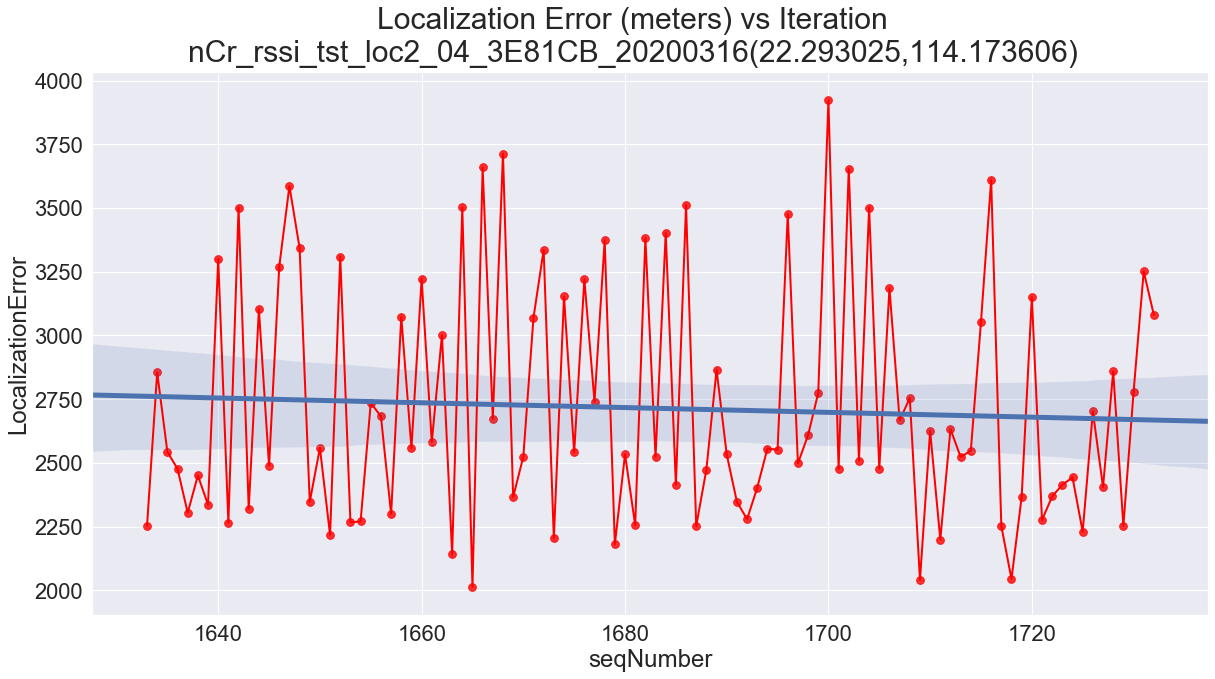

In [20]:
#Make the name of the location and add it to the plot title
locName = fileName.replace("cleaned_", "")
lat = str(excelData['DeviceGPSLat'].values[1])
lng = str(excelData['DeviceGPSLng'].values[1])
gps = '({},{})'.format(lat,lng)
locName+=gps
print(locName)

sb.set(font_scale=2)
f4, axes4 = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))
f4.suptitle('Localization Error (meters) vs Iteration\n'+locName, fontsize=30, y=0.97)
df_plot = sortedData[sortedData['note']=='lls'] #Only RSSI measurements are needed
df_plot = df_plot.reset_index(drop=True)
df_plot['Iteration'] = df_plot.index+1
df_plot
sb.lineplot(x="seqNumber", y="LocalizationError", data=df_plot, linewidth=2,color='red')
# sb.barplot(x="Iteration", y="LocalizationError", data=df_plot)
sb.regplot(x = "seqNumber", y = "LocalizationError", data = df_plot, x_ci='sd', line_kws={"linewidth": 5},scatter_kws={'s':60,'color':'red'}, robust=True)



In [21]:

locName

'nCr_rssi_tst_loc2_04_3E81CB_20200316(22.293025,114.173606)'

In [22]:
df = sortedData
min_loc_err = df['LocalizationError'].min()
print("min LE:\t",min_loc_err)
df = df[df['LocalizationError']==min_loc_err].head(1)
print('alpha:\t',df['PathLossExponent'].values)
print('ref rssi:',df['ReferenceRSSI'].values)
print()
nCr_min_loc_err = df['nCrLocalizationError'].min()
print("nCr min LE:\t",nCr_min_loc_err)
df = df[df['nCrLocalizationError']==nCr_min_loc_err].head(1)
print('nCr alpha:\t',df['nCrPathLossExponent'].values)
print('nCr ref rssi:\t',df['nCrReferenceRSSI'].values)
print()
print(fileName)

min LE:	 2014.233554044809
alpha:	 [2.5]
ref rssi: [-33]

nCr min LE:	 1936.252471093936
nCr alpha:	 [3.10046312]
nCr ref rssi:	 [-44.7602209]

cleaned_nCr_rssi_tst_loc2_04_3E81CB_20200316
